# Groceries preprocessing

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
raw_file = pd.read_csv('../../data-assignment2/Groceries_dataset.csv')
raw_file.head(n=20)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


## Analysis of data

In [8]:
raw_file.groupby(by=["Member_number", "Date"]).count().head(n=50)

itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
1001          02-05-2015                2
              07-02-2014                3
              12-12-2014                2
              14-04-2015                2
              20-01-2015                3
1002          09-02-2014                2
              26-04-2014                2
              26-04-2015                2
              30-08-2015                2
1003          10-02-2015                2
              15-10-2014                2
              19-01-2014                2
              27-02-2014                2
1004          01-05-2014                2
              01-07-2014                2
              02-12-2015                2
              04-02-2014                3
              10-06-2014                3
              10-07-2014                2
              13-10-2014                4
              19-08-2014                3
1005          09-01-2014                2
              23-01-2014                2
1006          05-07-2014                3
              09-04-2014                2
              11-07-2014                2
              14-06-2015                8
1008          03-10-2015                4
              21-07-2015                8
1009          05-10-2015                3
              14-05-2015                2
              23-09-2015                2
              24-01-2014                2
1010          05-03-2014                3
              10-04-2014                2
              23-08-2014                2
              27-08-2014                2
              31-07-2015                3
1011          02-06-2014                2
              09-12-2015                7
              15-02-2014                4
1012          03-10-2015                2
              19-11-2015                5
              22-06-2014                2
              27-03-2015                2

It can be seen that it is possible for a member to make multiple transactions across different dates. For our Apriori algorithm, we will make the assumption that for every member that makes a transaction on different dates, they are considered to be in different market analysis baskets.

In [14]:
grouped_df = raw_file.groupby(by=["Member_number", "Date"])['itemDescription'].apply(list).reset_index()

In [13]:
raw_file.groupby(by=["Member_number", "Date"]).agg({'itemDescription': lambda x: ','.join(x)})

itemDescription
Member_number Date                                                         
1000          15-03-2015      sausage,whole milk,semi-finished bread,yogurt
              24-06-2014                      whole milk,pastry,salty snack
              24-07-2015                        canned beer,misc. beverages
              25-11-2015                           sausage,hygiene articles
              27-05-2015                            soda,pickled vegetables
...                                                                     ...
4999          24-01-2015  tropical fruit,berries,other vegetables,yogurt...
              26-12-2015                                bottled water,herbs
5000          09-03-2014                       fruit/vegetable juice,onions
              10-02-2015           soda,root vegetables,semi-finished bread
              16-11-2014                      bottled beer,other vegetables

[14963 rows x 1 columns]

In [15]:
grouped_df.to_csv('../data/processed/groceries.csv')

# MovieLens Pre-processing

In [17]:
movie_raw_file = pd.read_csv('../../data-assignment2/movie.csv')
movie_raw_file.head(n=20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [31]:
rating_raw_file = pd.read_csv('../../data-assignment2/rating.csv')
rating_raw_file.head(n=20)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


In [57]:
rating_raw_file[(rating_raw_file['userId'] == 1) & (rating_raw_file['rating'] >= 4.0)]

,userId,movieId,rating,timestamp
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46
10,1,293,4.0,2005-04-02 23:31:43
...,...,...,...,...
168,1,8368,4.0,2005-04-02 23:48:08
170,1,8507,5.0,2004-09-10 03:13:47
171,1,8636,4.5,2005-04-02 23:44:53
173,1,8961,4.0,2005-04-02 23:47:09


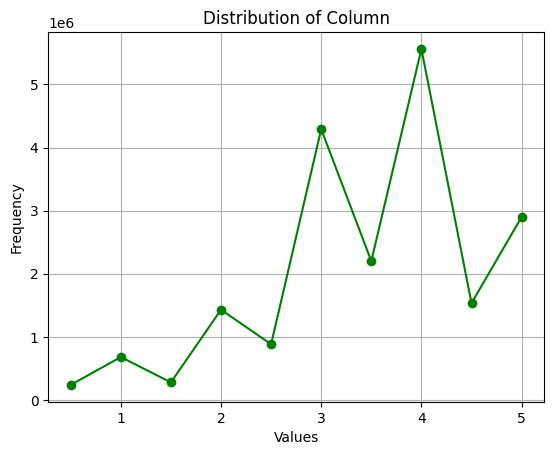

In [27]:
# Get value counts for the column
value_counts = rating_raw_file['rating'].value_counts().sort_index()

# Plotting the distribution of the column using a line chart
plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-', color='green')  # Line chart
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Column')
plt.grid(True)
plt.show()

In this distribution of the ratings, we can see the rough distribution of ratings in the dataset. For this apriori algorithm, we will set our threshold rating value (above which we consider that movie to be accepted into the market analysis basket) to a rating of 4.5.

TODO: We can do something like find out whats the upper quartile value (75 percentile) and use that as a benchmark.

### Joining the 2 tables by movie ID

In [58]:
joined_df = pd.merge(rating_raw_file,movie_raw_file, on='movieId',how='inner').sort_values(by=['userId'])

In [59]:
filtered_df = joined_df[joined_df['rating'] >= 4.5]

In [60]:
filtered_df

,userId,movieId,rating,timestamp,title,genres
2396003,1,7153,5.0,2005-04-02 23:30:33,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy
2474576,1,8636,4.5,2005-04-02 23:44:53,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX
2473338,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),Crime|Drama|Horror
2207284,1,4993,5.0,2005-04-02 23:31:22,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
926291,1,1196,4.5,2005-04-02 23:32:22,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
...,...,...,...,...,...,...
9576557,138493,51662,4.5,2009-10-18 09:08:28,300 (2007),Action|Fantasy|War|IMAX
10278323,138493,2115,4.5,2009-10-17 22:13:00,Indiana Jones and the Temple of Doom (1984),Action|Adventure|Fantasy
19106934,138493,7008,5.0,2009-10-17 19:55:18,Last Tango in Paris (Ultimo tango a Parigi) (1...,Drama|Romance
2266440,138493,5679,5.0,2009-10-17 20:31:18,"Ring, The (2002)",Horror|Mystery|Thriller


In [61]:
filtered_df=filtered_df.drop(columns=['timestamp', 'genres', 'rating'])

In [62]:
filtered_df=filtered_df.drop(columns=['title'])

In [63]:
filtered_df = filtered_df.groupby(by=["userId"])['movieId'].apply(list).reset_index()

In [68]:
filtered_df

,userId,movieId
0,1,"[7153, 8636, 8507, 4993, 1196, 1198, 5952]"
1,2,"[1974, 3513, 1544, 70, 260, 266, 1249, 480, 12..."
2,3,"[1089, 1206, 1210, 593, 1266, 1196, 1909, 318,..."
3,4,"[454, 733]"
4,5,"[1291, 454, 671, 589, 531, 1198, 150, 590, 62,..."
...,...,...
136467,138489,"[1148, 1212, 1193, 1203, 2019, 1221, 912, 50, ..."
136468,138490,"[3006, 34, 2437, 1653, 2725, 1535, 111, 32, 59..."
136469,138491,"[3186, 2857]"
136470,138492,"[8376, 441, 1358, 1923, 2599, 3552, 6863, 1649..."


In [69]:
filtered_df.to_csv('../data/processed/movie.csv')